In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

# Sample Figures with One Model

In [4]:
model_list = [
    # Main set of models with instruct divide and size variety
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # Small reference model - would allow for pretraining variation
    "gpt2-medium",
    # Other open models
    "allenai/OLMo-2-1124-7B",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b",
    "google/gemma-7b-it"
]

def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42_07_18/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    model_results.loc[model_results["Covered"] == True, "Judgment"] = "Covered"
    model_results.loc[model_results["Covered"] == True, "Judgment_prob"] = model_results["Covered_prob"]
    model_results.loc[model_results["NotCovered"] == True, "Judgment"] = "NotCovered"
    model_results.loc[model_results["NotCovered"] == True, "Judgment_prob"] = model_results["NotCovered_prob"]
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in model_list]
combined_df = pd.concat(combined_results).reset_index()
combined_df.loc[:, "item"] = combined_df["title"] + combined_df["version"]
combined_df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'runs/runs-42_07_18/meta-llama/Llama-3.2-1B-results.csv'

In [4]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
12557,137,Vehicle Glass II,yes_or_no,Aneesh's car insurance policy includes coverag...,controversial,yes,"yes.\nThe term ""glass"" is a common noun, and ...",NaN,-2.70403,0.312869,...,0.24678,0.312869,0.24678,True,False,1.070022,gemma-7b,Covered,0.312869,Vehicle Glass IIcontroversial


In [5]:
combined_df

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
0,0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,it,it depends.\nThe insurance company's definiti...,NaN,-5.554084,0.095245,...,0.068116,0.095245,0.068116,True,False,0.556171,Llama-3.2-1B,Covered,0.095245,Emergency Damages Iunambiguous_uncovered
1,1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,it,it depends.\nThe insurance company argues tha...,NaN,-5.560510,0.096750,...,0.067207,0.096750,0.067207,True,False,0.557145,Llama-3.2-1B,Covered,0.096750,Emergency Damages Iunambiguous_covered
2,2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,it,it depends.\nThe insurance company's definiti...,NaN,-5.304534,0.112464,...,0.070489,0.112464,0.070489,True,False,0.597797,Llama-3.2-1B,Covered,0.112464,Emergency Damages Icontroversial
3,3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,it,it depends.\nThe first thing to note is that ...,NaN,-4.786050,0.141056,...,0.083616,0.141056,0.083616,True,False,0.681065,Llama-3.2-1B,Covered,0.141056,Emergency Damages IIunambiguous_uncovered
4,4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,it,it depends.\nThe first thing to note is that ...,NaN,-4.936429,0.120958,...,0.086790,0.120958,0.086790,True,False,0.652136,Llama-3.2-1B,Covered,0.120958,Emergency Damages IIunambiguous_covered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14899,1237,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.750042,0.000159,...,0.049785,0.367862,0.049785,True,False,0.713895,gemma-7b-it,Covered,0.367862,Vehicle Glass Iunambiguous_covered
14900,1238,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.541211,0.000153,...,0.037209,0.101144,0.037209,True,False,0.440780,gemma-7b-it,Covered,0.101144,Vehicle Glass Icontroversial
14901,1239,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.605734,0.000236,...,0.034860,0.257580,0.034860,True,False,0.617459,gemma-7b-it,Covered,0.257580,Vehicle Glass IIunambiguous_uncovered
14902,1240,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.389812,0.000179,...,0.043501,0.412730,0.043501,True,False,0.720363,gemma-7b-it,Covered,0.412730,Vehicle Glass IIunambiguous_covered


In [19]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
yes_or_no_df = combined_df[prompt_type_mask]

yes_or_no_group_df = yes_or_no_df.groupby(["model_name"], as_index=False, sort=False).aggregate( {'Covered_prob':['mean','std'], 'NotCovered_prob':['mean','std'], 'Other_prob' :['mean','std']})
yes_or_no_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
6280,70,Personal Accident I,yes_or_no,Gwen's car insurance policy includes coverage ...,unambiguous_covered,no,"no. \nExplanation: \nThe phrase ""traveling in...",NaN,-3.417552,0.304731,...,0.484672,0.304731,0.484672,False,True,1.041229,Llama-3.1-8B-Instruct,NotCovered,0.484672,Personal Accident Iunambiguous_covered


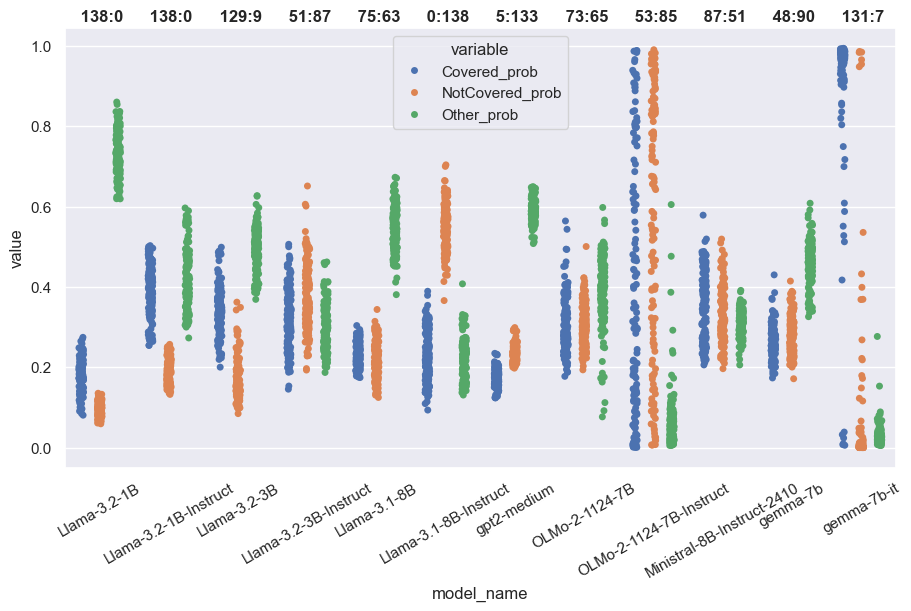

In [30]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

count_labels = yes_or_no_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels


p = sns.stripplot(x='model_name', y='value',  hue='variable', jitter=True, dodge=True, data=yes_or_no_df.melt(id_vars = ["model_name"], value_vars=["Covered_prob", "NotCovered_prob", "Other_prob"]))
for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(i, ax.get_ylim()[1] + 0.01, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')

In [6]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
data_df = combined_df[prompt_type_mask]

covered_mask = data_df["Judgment"] == "Covered"
not_covered_mask = data_df["Judgment"] == "NotCovered"
count_labels = data_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels

,model_name,Covered,NotCovered
0,Llama-3.2-1B,138,0
1,Llama-3.2-1B-Instruct,138,0
2,Llama-3.2-3B,129,9
3,Llama-3.2-3B-Instruct,51,87
4,Llama-3.1-8B,75,63
5,Llama-3.1-8B-Instruct,0,138
6,gpt2-medium,5,133
7,OLMo-2-1124-7B,73,65
8,OLMo-2-1124-7B-Instruct,53,85
9,Ministral-8B-Instruct-2410,87,51


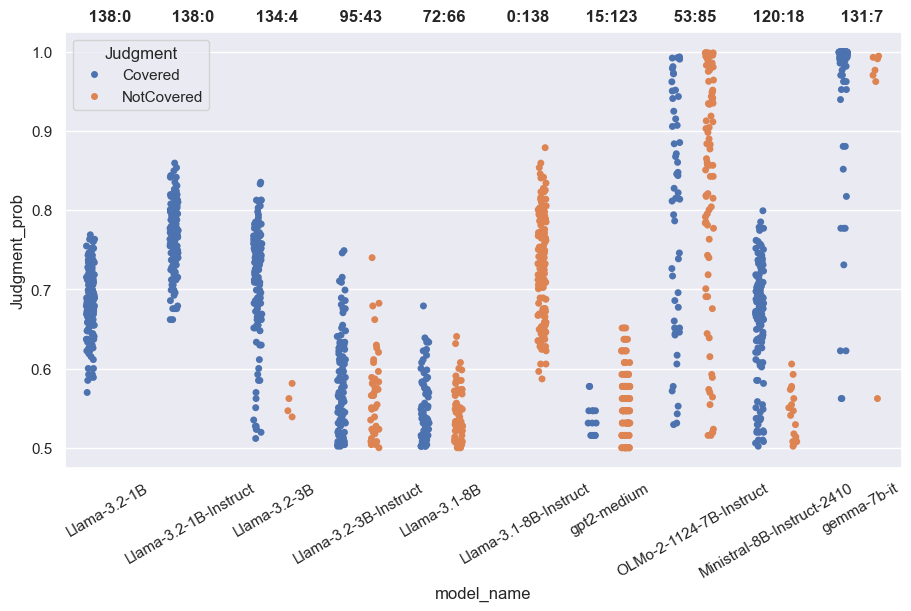

In [25]:
# Plot
# 1. For each models we plot the higher probability option with its normalized probability
# 2. Some models don't stick to script and are apparent here
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
data_df = combined_df[prompt_type_mask]

covered_mask = data_df["Judgment"] == "Covered"
not_covered_mask = data_df["Judgment"] == "NotCovered"
count_labels = data_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)

p = sns.stripplot(x='model_name', y='Judgment_prob',  hue='Judgment', jitter=True, dodge=True, data=data_df)

# p = sns.swarmplot(x='model_name', y='Judgment_prob',  hue='Judgment',  data=data_df, size=1)
# Labels showing proportions

for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(i, ax.get_ylim()[1] + 0.01, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')

### Prob Diff

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_50249/3991500294.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Diff_prob"] = data_df["Covered_prob"] - data_df["NotCovered_prob"]
/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_50249/3991500294.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Diff_prob"] = np.abs(data_df["Diff_prob"].values)


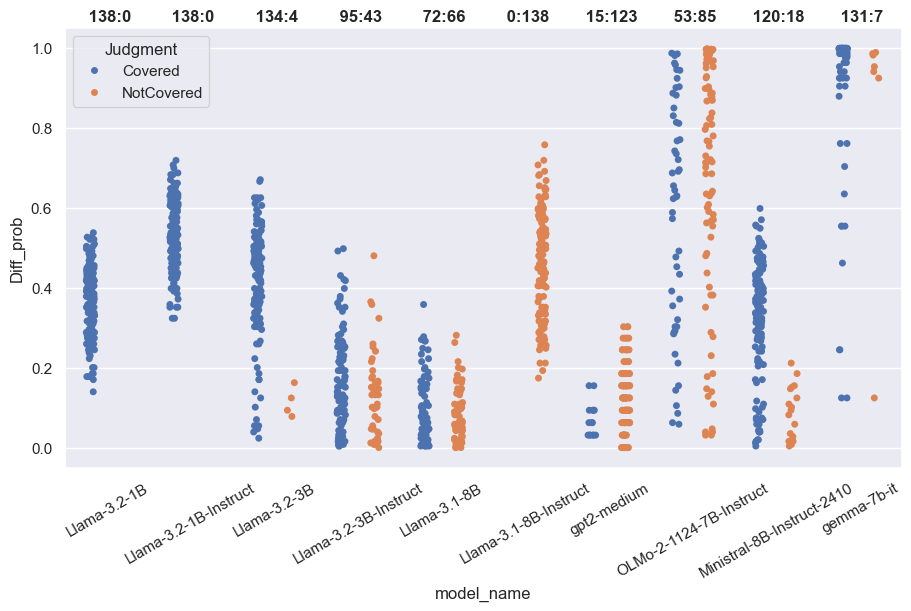

In [26]:
# Difference
# Plot
# 1. For each model we plot the difference between the normalized probability
# 2. Some models don't stick to script and are apparent here
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
data_df = combined_df[prompt_type_mask]

covered_mask = data_df["Judgment"] == "Covered"
not_covered_mask = data_df["Judgment"] == "NotCovered"
count_labels = data_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
data_df["Diff_prob"] = data_df["Covered_prob"] - data_df["NotCovered_prob"]
data_df["Diff_prob"] = np.abs(data_df["Diff_prob"].values)
p = sns.stripplot(x='model_name', y='Diff_prob',  hue='Judgment', jitter=True, dodge=True, data=data_df)

# p = sns.swarmplot(x='model_name', y='Judgment_prob',  hue='Judgment',  data=data_df, size=1)
# Labels showing proportions

for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(i, ax.get_ylim()[1] + 0.01, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')

### Multiple Tokens - Sum

In [29]:
models= [
   "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    "gpt2-medium",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b-it"
]
def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42-07_10/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)

    # Method 1 
    # One token for Covered
    # One token for Not Covered
    # Method 2
    # Max(K tokens for covered)
    p(Yes), p(yes)
    p(No) > p(no)
    # Max(K tokens for not covered)
    # Method 3
    # Sum(K tokens for covered)
    # Sum(K tokens for not covered)
    candidates = ['YES', 'Yes', 'yes', 'NO', 'No', 'no', 'A', 'B']
    yes_candidates = ['YES', 'Yes', 'yes']
    # Raw logprob
    # Sum(p(yi...yb))
    no_candidates = ['NO', 'No', 'no']
    # Raw logprob
    # Sum(p(yi...yb))
    
    model_results["yes_probs"] = np.sum([model_results[candidate + "_probs"] for candidate in yes_candidates], axis=0)
    model_results["no_probs"] = np.sum([model_results[candidate + "_probs"] for candidate in no_candidates], axis=0)
    
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    model_results.loc[model_results["Covered"] == True, "Judgment"] = "Covered"
    model_results.loc[model_results["Covered"] == True, "Judgment_prob"] = model_results["Covered_prob"]
    model_results.loc[model_results["NotCovered"] == True, "Judgment"] = "NotCovered"
    model_results.loc[model_results["NotCovered"] == True, "Judgment_prob"] = model_results["NotCovered_prob"]
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in models]
combined_df = pd.concat(combined_results).reset_index()
combined_df.loc[:, "item"] = combined_df["title"] + ["version"]
combined_df.shape

meta-llama/Llama-3.2-1B output
yes       565
"         256
B         165
A         111
Yes        85
it         47
Harper      7
No          6
Name: count, dtype: int64
meta-llama/Llama-3.2-1B-Instruct output
yes    768
B      267
No     161
        17
\n      11
Yes      9
A        9
Name: count, dtype: int64
meta-llama/Llama-3.2-3B output
yes    846
B      260
no     112
A       14
No       7
C        2
\n       1
Name: count, dtype: int64
meta-llama/Llama-3.2-3B-Instruct output
yes    821
B      259
No      92
no      47
A       17
\n       6
Name: count, dtype: int64
meta-llama/Llama-3.1-8B output
yes    789
B      184
no     177
A       92
Name: count, dtype: int64
meta-llama/Llama-3.1-8B-Instruct output
no     617
yes    272
B      226
No      67
A       50
Yes     10
Name: count, dtype: int64
gpt2-medium output
yes      580
no       253
A        201
"        133
B         71
Genie      3
No         1
Name: count, dtype: int64
allenai/OLMo-2-1124-7B-Instruct output
no      732
ye

(12420, 28)

In [32]:
combined_df.to_csv("reports/combined-results_07_10.csv", index=False)

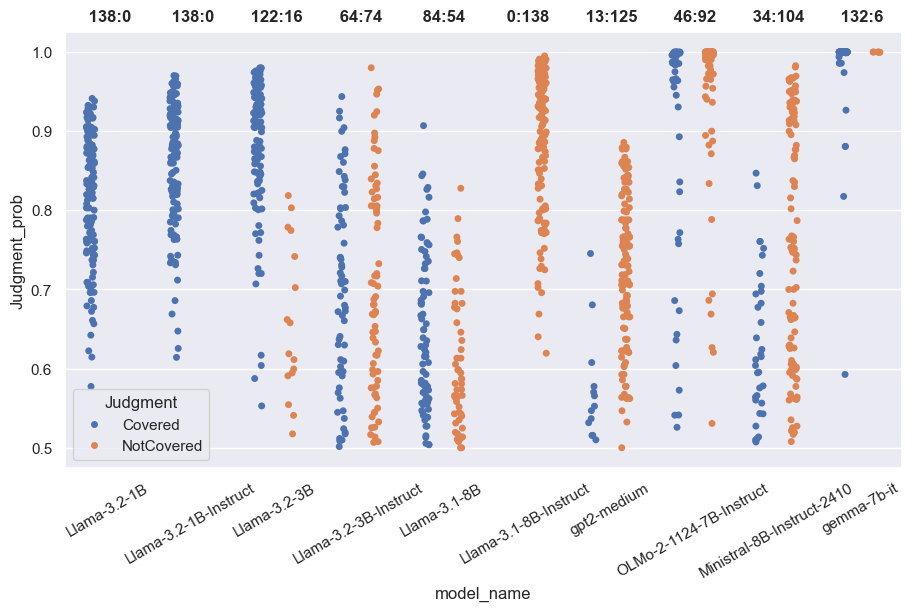

In [30]:
# Difference
# Plot
# 1. For each model we plot the difference between the normalized probability
# 2. Some models don't stick to script and are apparent here
                                 
                                  
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
data_df = combined_df[prompt_type_mask]

covered_mask = data_df["Judgment"] == "Covered"
not_covered_mask = data_df["Judgment"] == "NotCovered"
count_labels = data_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
p = sns.stripplot(x='model_name', y='Judgment_prob',  hue='Judgment', jitter=True, dodge=True, data=data_df)

# p = sns.swarmplot(x='model_name', y='Judgment_prob',  hue='Judgment',  data=data_df, size=1)
# Labels showing proportions

for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(i, ax.get_ylim()[1] + 0.01, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')

# Greedy decoding

In [64]:
candidates = ['Yes', 'yes', 'NO', 'no', 'A', 'B']
non_candidates = combined_df[combined_df.output.apply(lambda x: x.strip() not in candidates)]

In [65]:
non_candidates.prompt_type.value_counts().sum()

np.int64(1553)

In [66]:
non_candidates.model_name.value_counts()

model_name
Ministral-8B-Instruct-2410    460
Llama-3.2-1B                  316
gemma-7b-it                   271
Llama-3.2-1B-Instruct         189
gpt2-medium                   137
Llama-3.2-3B-Instruct          98
Llama-3.1-8B-Instruct          67
Llama-3.2-3B                   10
OLMo-2-1124-7B-Instruct         5
Name: count, dtype: int64

In [67]:
yes_no_A_B = ['yes','no', 'A', 'B']
non_yes_no_A_B = combined_df[combined_df.output.apply(lambda x: x.strip() not in yes_no_A_B)]

In [68]:
non_yes_no_A_B.shape

(1948, 28)

In [69]:
non_yes_no_A_B.shape, combined_df.shape

((1948, 28), (12420, 28))

In [70]:
non_yes_no_A_B.model_name.value_counts()

model_name
Ministral-8B-Instruct-2410    730
Llama-3.2-1B                  401
gemma-7b-it                   292
Llama-3.2-1B-Instruct         198
gpt2-medium                   137
Llama-3.2-3B-Instruct          98
Llama-3.1-8B-Instruct          77
Llama-3.2-3B                   10
OLMo-2-1124-7B-Instruct         5
Name: count, dtype: int64

In [71]:
non_yes_no_A_B.output.value_counts()

output
 No        789
 Yes       395
 "         389
\n\n       271
 it         47
 \n         18
            17
 Harper      7
 [           4
 Genie       3
 **          3
 C           2
 Carol       2
 \n\n        1
Name: count, dtype: int64

In [72]:
non_candidates.to_csv("reports/non_candidate_samples.csv")

# TODO * This with another figure showing the items for which it matches human majority judgement

# Coincide with human majority judgement

In [20]:
data_df.model_name.value_counts()

model_name
Llama-3.2-1B                  138
Llama-3.2-1B-Instruct         138
Llama-3.2-3B                  138
Llama-3.2-3B-Instruct         138
Llama-3.1-8B                  138
Llama-3.1-8B-Instruct         138
gpt2-medium                   138
OLMo-2-1124-7B-Instruct       138
Ministral-8B-Instruct-2410    138
gemma-7b-it                   138
Name: count, dtype: int64

In [94]:
by_model_prompt_type = combined_df.groupby(['prompt_type', 'model_name'],as_index=False, sort=False).aggregate({'Covered_Num': "sum", 'NotCovered_Num': "sum"})
by_model_prompt_type.loc[:, "Majority_Proportion"] = by_model_prompt_type[["Covered_Num", "NotCovered_Num"]].max(axis=1)
by_model_prompt_type.loc[:, "Majority_Proportion"] = by_model_prompt_type["Majority_Proportion"].apply(lambda x: x/138)

In [95]:
by_model_prompt_type

,prompt_type,model_name,Covered_Num,NotCovered_Num,Majority_Proportion
0,yes_or_no,Llama-3.2-1B-Instruct,66.0,72.0,0.521739
1,no_or_yes,Llama-3.2-1B-Instruct,0.0,138.0,1.000000
2,negation,Llama-3.2-1B-Instruct,109.0,29.0,0.789855
3,agreement,Llama-3.2-1B-Instruct,0.0,138.0,1.000000
4,agreement_negation,Llama-3.2-1B-Instruct,138.0,0.0,1.000000
...,...,...,...,...,...
58,agreement_negation,gemma-7b-it,138.0,0.0,1.000000
59,disagreement,gemma-7b-it,16.0,122.0,0.884058
60,disagreement_negation,gemma-7b-it,4.0,134.0,0.971014
61,options,gemma-7b-it,138.0,0.0,1.000000


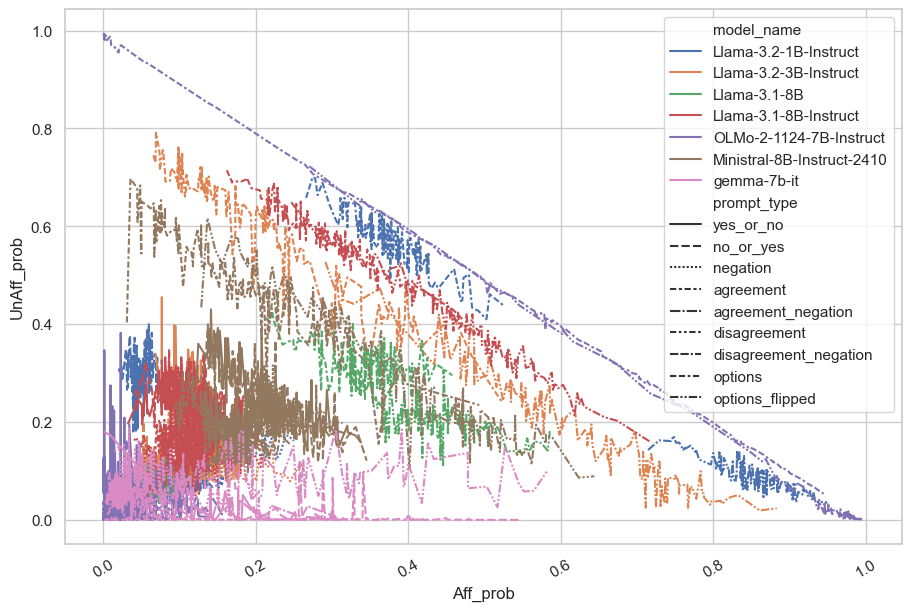

In [197]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="whitegrid")
p = sns.lineplot(x='Aff_prob', y='UnAff_prob', hue='model_name', style='prompt_type', data=combined_df)
plt.show()

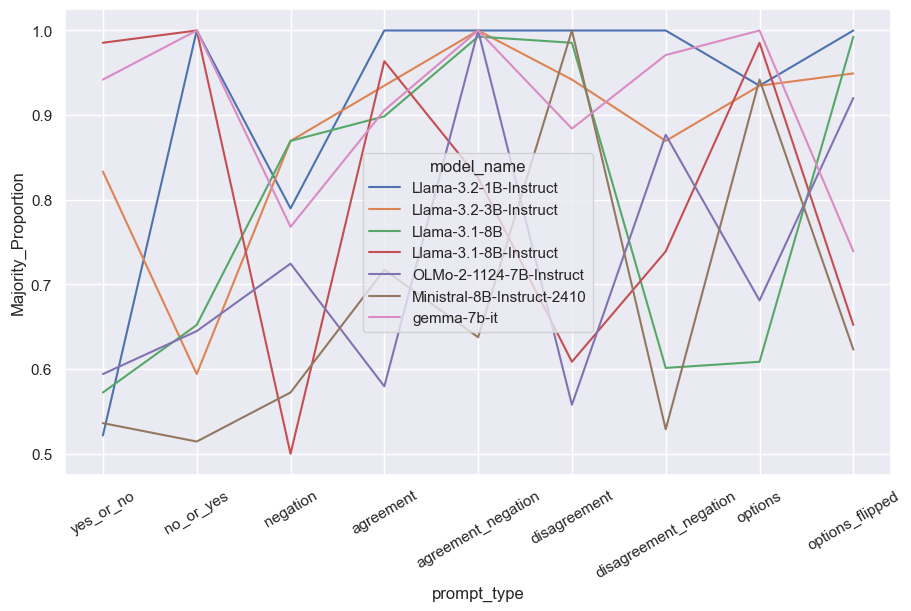

In [203]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
sns.lineplot(x='prompt_type', y = 'Majority_Proportion', hue='model_name', data=by_model_prompt_type)
plt.show()

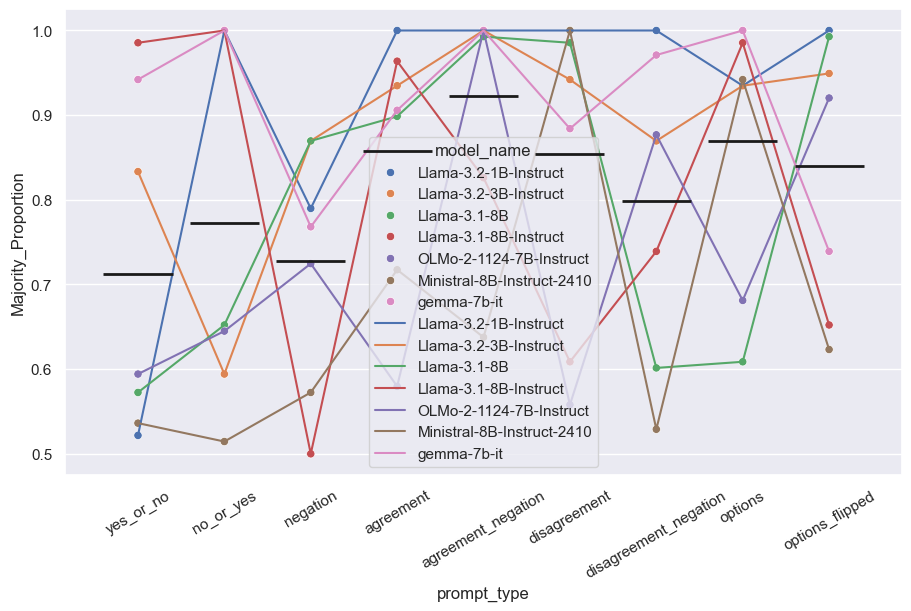

In [180]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
p = sns.scatterplot(x='prompt_type', y='Majority_Proportion', hue='model_name', data=by_model_prompt_type)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="prompt_type",
            y="Majority_Proportion",
            data=by_model_prompt_type,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
sns.relplot(x='prompt_type', y = 'Majority_Proportion', hue='model_name', data=by_model_prompt_type, kind='line', ax=ax)
# Put lines for each hue/lighted
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
p = sns.scatterplot(x='prompt_type', y='Majority_Proportion', hue='model_name', data=by_model_prompt_type)
plt.show()

# Model response distribution

# Human responses|

In [114]:
human_responses = pd.read_csv("data/human/main-merged.csv")
human_responses.sample()

,workerid,proliferate.condition,confidence,continuation,header,individual_judgment,item,population_judgment,slide_number_in_experiment,time,...,subject_information.language,subject_information.legaltraining,subject_information.problems,subject_information.race,system.Browser,system.OS,system.screenH,system.screenW,time_in_minutes,error
1033,1761,condition1,4,"One day, while Margot is away from her home, h...","Margot has home insurance that covers ""Garden ...",yes,Garden Plants,99,4,25285,...,English,0,no issues,White,Firefox,Windows,768,1366,2.44285,NaN


In [115]:
human_responses.shape, human_responses.individual_judgment.unique()

((4140, 29), array(['yes', 'no', 'cantdecide'], dtype=object))

In [116]:
yes_responses = np.sum(human_responses["individual_judgment"] == "yes")
no_responses = np.sum(human_responses["individual_judgment"] == "no")
cant_decide = np.sum(human_responses["individual_judgment"] == "cantdecide")

In [117]:
yes_responses, no_responses, cant_decide

(np.int64(2347), np.int64(1619), np.int64(174))

In [119]:
yes_responses/30, no_responses/30, cant_decide/30

(np.float64(78.23333333333333), np.float64(53.96666666666667), np.float64(5.8))

In [118]:
len(human_responses.workerid.unique())

1378

In [110]:
human_responses.loc[human_responses['individual_judgment'] == 'yes', 'yes_judgement'] = 1
human_responses.loc[human_responses['individual_judgment'] != 'yes', 'yes_judgement'] = 0

human_responses.loc[human_responses['individual_judgment'] == 'no', 'no_judgement'] = 1
human_responses.loc[human_responses['individual_judgment'] != 'no', 'no_judgement'] = 0

In [134]:
item_level_judgments = human_responses.groupby(['item', 'version'], as_index=False, sort=False).aggregate({
    'yes_judgement': 'sum', 
    'no_judgement': 'sum'
})
item_level_judgments.loc[:, 'item_name'] =  item_level_judgments["item"] + item_level_judgments["version"]

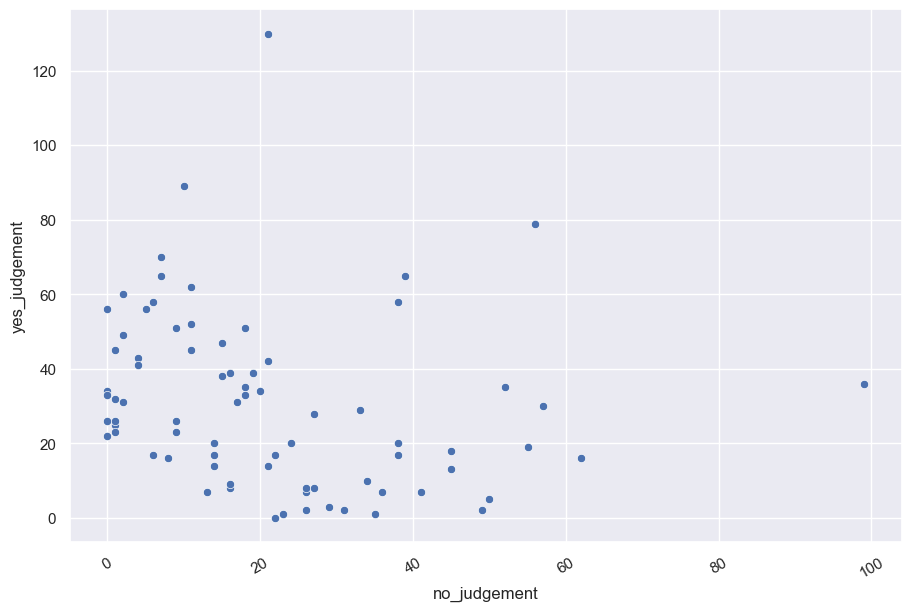

In [141]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
p = sns.scatterplot(x='no_judgement', y='yes_judgement', data=item_level_judgments)